# Import Dependencies

In [126]:
import pandas as pd
import numpy as np
import json
import requests

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

# Explore dataset

In [127]:
URL = 'https://raw.githubusercontent.com/prust/wikipedia-movie-data/master/movies.json'

def create_dataframe(url):
    '''
        This function create a dataframe from a json file posted online.
        
        input: String url
        return: DataFrame df 
    '''
    re = requests.get(URL)
    data = re.json()                 #convert json file to a dictionary.
    df = pd.DataFrame(data)   #create a dataframe from a dictionary.
    return df

#create a dataframe from a json file in a given link. 
full_df = create_dataframe(URL)

#check the result
display(full_df.head(20))

,title,year,cast,genres
0,After Dark in Central Park,1900,[],[]
1,Boarding School Girls' Pajama Parade,1900,[],[]
2,Buffalo Bill's Wild West Parad,1900,[],[]
3,Caught,1900,[],[]
4,Clowns Spinning Hats,1900,[],[]
5,Capture of Boer Battery by British,1900,[],"[Short, Documentary]"
6,The Enchanted Drawing,1900,[],[]
7,Feeding Sea Lions,1900,[Paul Boyton],[]
8,How to Make a Fat Wife Out of Two Lean Ones,1900,[],[Comedy]
9,New Life Rescue,1900,[],[]


In [128]:
# Check Data Type and Missing Values
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28795 entries, 0 to 28794
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   28795 non-null  object
 1   year    28795 non-null  int64 
 2   cast    28795 non-null  object
 3   genres  28795 non-null  object
dtypes: int64(1), object(3)
memory usage: 900.0+ KB


# Count number of movies each year

In [137]:
def count_movies(df,col):
    '''
        This function counts numbers of movies in each year.
        
        input: DataFrame df, string col
        return: DataFrame stat_df
    '''
    stat_df = df.groupby(by=col,as_index=False).count()
    return stat_df


def visualize(df,x, y, title):
    '''
        This function creates a 2D histogram of the dataframe according to the given inputs x and y.
        
        inputs: string x, string y
        return: 
    '''
    plt.figure(figsize=(8,6))
    plt.bar(df[x].tolist(), df[y])

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)

    plt.show()

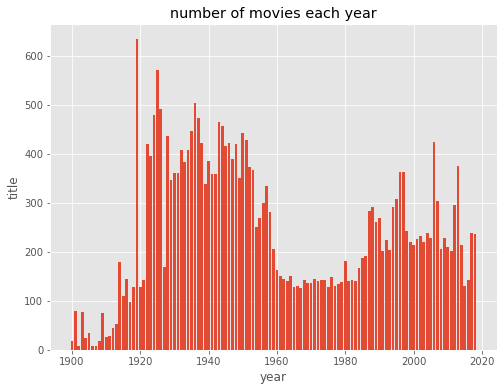

In [146]:
#create a dataframe of number of movies in each year.
movie_count_df = count_movies(full_df,'year')

#create a visualization of movie_count_df
visualize(movie_count_df,'year','title', title= 'number of movies each year')

# A map of genres and a list of movies

In [147]:
def create_movie_list(df):
    '''
        This function creates a dictionary of each genre and its corresponding list of movies under that categories.
        
        input: DataFrame df
        return: Dictionary genr_movi_dict
    '''
    genre_lst = []
    genre_uniq = df['genres'].tolist()
    for item in genre_uniq:
        genre_lst.extend(item)
    
    #remove redundant genres
    genre_lst= list(set(genre_lst))
    
    #create a dictionary with key is the genre and the value is an empty list to store the titles.
    genr_movi_dict = dict(zip(genre_lst, [[] for i in range(len(genre_lst))]))

    for i in range(df.shape[0]):
        for item in df.iloc[i,3]:                        #check each genre in the "genres" column.
            genr_movi_dict[item].append(df.iloc[i,0])    #add title to the values 
            
    return  genr_movi_dict



def visualize_helper(dic):
    '''
        This function creates a dataframe which can be used for visualization.
        
        input: Dictionary dic
        return: DataFrame temp_df
    '''
    for k,v in dic.items():
        dic[k] = len(v)

    new_temp = {"genres": list(dic.keys()), "counts": list(dic.values())}
    temp_df = pd.DataFrame(new_temp)
    return temp_df

def visualize_genre(df,x, y, title, ro):
    '''
        This function creates a 2D histogram of the dataframe according to the given inputs x and y.
        
        inputs: string x, string y
        return: 
    '''
    
    plt.figure(figsize=(8,6))
    plt.bar(df[x].tolist(), df[y])

    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(rotation=ro)
    plt.title(title)

    plt.show()

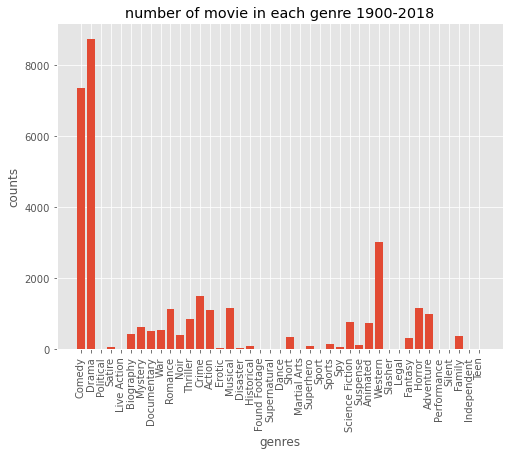

In [148]:
#create a dictionary of genre and movies under that category.
genr_movi_dict = create_movie_list(full_df)

#create a dataframe of genres and number of movies in each genre.
temp_df = visualize_helper(genr_movi_dict)
    
#chech the distribution of each genre.
visualize_genre(temp_df,"genres", "counts", "number of movie in each genre 1900-2018", ro= 90)

# All actors and actresses in 2018 drama movie 

In [149]:
def create_sub_df(df, year):
    '''
        This function creates a sub dataframe of full_df in 2018.
        
        inputs: DataFrame df, Int year
        return: DataFrame col1_df, DataFrame col2_df
    '''
    new_df = df.loc[df['year'] == year, ('cast','genres')]
    idx = [i for i in range(new_df.shape[0])]
    new_df["idx"] = idx
    col1_df = new_df[['cast','idx']]
    col2_df = new_df[['genres','idx']]
    
    return col1_df, col2_df

def genres_filter(df, genr):
    '''
        This funtion creates a dataframe of genres of interest and the corresponding index
        
        inputs: DataFrame df, string genr
        return: DataFrame new_df
    '''
    records = {"idx":[], "genres":[]}
    genres = df['genres'].tolist()
    
    for i in range(df.shape[0]):
        if genr in genres[i]:
            records['idx'].append(i)
            records['genres'].append(genres[i])
        
    new_df = pd.DataFrame(records)
    return new_df

def merge_df(df1,df2):
    '''
        This function merges two dataframe on index.
        
        input: DataFrame df1, DataFrame df2
        return: DataFrame new_df
    '''
    new_df = pd.merge(df1, df2, on='idx', how="right")
    return new_df

def cast_genre_year(df, genr, year):
    '''
        This function creates a dataframe with cast,idx and genre according to the given genre and year.
        
        inputs: DataFrame df, string genr, int year.
                                                return: DataFrame new_df
                                            '''
                                            cast_df, genre_df = create_sub_df(df, year)

                                            filtered_genre_df = genres_filter(genre_df, genr)

                                            new_df = merge_df(cast_df, filtered_genre_df)

                                            return new_df

                                        def get_actors(df):
                                            '''
                                                This function returns a set of names of actors/actresses in a given dataframe

                                                input: DataFrame df
                                                return: set actors
                                            '''
                                            actors = []
                                            casts = df['cast'].tolist()

                                            for item in casts:
                                                actors.extend(item)

                                            return set(actors)

In [150]:
#check if the dataframe is created expected
cast_2018_drama_df = cast_genre_year(full_df, 'Drama',2018)
cast_2018_drama_df.head()

,cast,idx,genres
0,"[Alex Pettyfer, James Freedson-Jackson, Emily ...",1,[Drama]
1,"[Bryan Brown, Sam Neill]",2,[Drama]
2,"[Liam Neeson, Vera Farmiga, Patrick Wilson, Jo...",3,"[Action, Crime, Drama, Mystery, Thriller]"
3,"[Alex Lawther, Abigail Breslin, Bette Midler, ...",6,[Drama]
4,"[Chris Hemsworth, Michael Shannon, Michael Peñ...",8,"[War, Drama]"


In [112]:
#create a set of actors/actresses in 2018 drama movie
actors = get_actors(cast_2018_drama_df)
print(actors)

{'Jim Cummings', 'Charlize Theron', 'Danika Yarosh', 'Linda Cardellini', 'Joanne Whalley', 'Cissy Houston', 'Rose Byrne', 'Nicholas X. Parsons', 'Thomasin McKenzie', 'Camille Salameh', 'Nicole Kidman', 'Victor Gojcaj', 'Eddie Redmayne', 'Jeff Kober', 'Billy Zane', 'Sylvie Testud', 'Maura Tierney', 'Lucas Hedges', 'James LeGros', 'Michelle Yeoh', 'Dylan McDermott', 'Josh Lucas', 'Simon Pegg', 'Eric Johnson', 'Lisa Lu', 'Emily Althaus', 'Ted McGinley', 'Peter Capaldi', 'Dan Fogler', 'Jim Gaffigan', 'Ben Kingsley', 'Ray Corasani', 'Amanda Seyfried', 'Jessica Rothe', 'Vincent Cassel', 'Kyle Chandler', 'Ewan McGregor', 'Rita Ora', 'Constance Wu', 'Bobby Campo', 'Ben Hardy', 'Stanley Tucci', 'Alison Sudol', 'Courtney B. Vance', 'Alex Pettyfer', 'Sunny Suljic', 'Evan Peters', 'Justin Bruening', 'Anna Kendrick', 'Dumbfoundead', 'Rory Uphold', 'Mahershala Ali', 'Luke Grimes', 'AnnaSophia Robb', 'Kodi Smit-McPhee', 'Brady Jandreau', 'Paula Jai Parker', 'Milla Jovovich', 'Patrick Schwarzenegger',